# CAPSTONE 3

NURMARYO ANGGITO
JCDS 2204

## INTRODUCTION

### BACKGROUND

Pasar mobil bekas di Arab Saudi sangat dinamis dan dipengaruhi oleh berbagai faktor seperti jenis mobil, wilayah, merek, jenis transmisi, asal, opsi tambahan, tahun pembuatan, ukuran mesin, jumlah kilometer, dan negosiasi. Penjual dan pembeli sering menghadapi tantangan dalam menentukan harga yang adil dan kompetitif untuk mobil bekas.

### PROBLEMS

Tidak adanya model yang dapat menentukan harga yang dapat diandalkan untuk mobil bekas di Arab Saudi menghambat kemampuan penjual untuk menetapkan harga yang kompetitif dan pembeli untuk membuat keputusan pembelian yang terinformasi. Metode tradisional mungkin tidak mempertimbangkan berbagai faktor yang memengaruhi harga mobil, menyebabkan ketidakakuratan dalam penetapan harga dan potensi kerugian finansial bagi penjual dan pembeli.

### GOALS

1. Mengembangkan model machine learning yang mampu memprediksi harga jual mobil bekas dengan akurasi tinggi.

2. Mengeksplorasi dan mengevaluasi beberapa model regresi, termasuk teknik tradisional dan ensemble.

3. Menggunakan metrik seperti Mean Absolute Percentage Error (MAPE), Root Mean Squared Error (RMSE), dan Mean Absolute Error (MAE) untuk menilai kinerja model.

### PROJECT SCOPE

Proyek ini berfokus pada pembuatan dan evaluasi model regresi, termasuk teknik tradisional dan ensemble. Evaluasi akan didasarkan pada metrik kinerja seperti Mean Absolute Percentage Error (MAPE), Root Mean Squared Error (RMSE), dan Mean Absolute Error (MAE).

Keberhasilan proyek akan diukur berdasarkan kemampuan model yang dikembangkan untuk memprediksi harga mobil bekas dengan MAPE, RMSE, dan MAE yang rendah. Model yang berhasil akan menyediakan alat berharga baik bagi penjual maupun pembeli di pasar mobil bekas Arab Saudi.

### SCORING METRICS

MAPE (Mean Absolute Percentage Error), RMSE (Root Mean Squared Error), dan MAE (Mean Absolute Error) adalah metrik evaluasi yang umum digunakan untuk mengukur kinerja model regresi atau prediksi. Berikut adalah penjelasan singkat untuk masing-masing metrik tersebut: 

1. Mean Absolute Percentage Error (MAPE)
    - Pemakaian:
MAPE digunakan untuk mengukur akurasi prediksi dalam bentuk persentase kesalahan relatif terhadap nilai sebenarnya.
Misalnya, jika MAPE adalah 10%, itu berarti rata-rata kesalahan prediksi adalah 10% dari nilai sebenarnya.
    - Fungsi:
Menyediakan indikasi seberapa besar kesalahan prediksi dalam persentase terhadap nilai sebenarnya.
Nilai MAPE yang lebih kecil menunjukkan tingkat akurasi yang lebih tinggi.
2. Root Mean Squared Error (RMSE)
    - Pemakaian:
RMSE digunakan untuk mengukur sejauh mana kesalahan prediksi tersebar dalam nilai-nilai sebenarnya.
Misalnya, jika RMSE adalah 5, itu berarti rata-rata kesalahan prediksi adalah sekitar 5 unit dari nilai sebenarnya.
    - Fungsi:
Menunjukkan seberapa besar perbedaan antara nilai prediksi dan nilai sebenarnya.
Nilai RMSE yang lebih kecil menunjukkan tingkat akurasi yang lebih tinggi.
3. Mean Absolute Error (MAE)
    - Pemakaian:
MAE digunakan untuk mengukur rata-rata kesalahan absolut antara nilai prediksi dan nilai sebenarnya.
Misalnya, jika MAE adalah 3, itu berarti rata-rata kesalahan prediksi adalah 3 unit.
    - Fungsi:
Memberikan gambaran tentang seberapa dekat prediksi dengan nilai sebenarnya.
Nilai MAE yang lebih kecil menunjukkan tingkat akurasi yang lebih tinggi.
- Perbandingan:
    - MAPE: Lebih fokus pada persentase kesalahan relatif.
    - RMSE: Lebih fokus pada sejauh mana kesalahan tersebar dalam nilai-nilai sebenarnya.
    - MAE: Memberikan gambaran kesalahan absolut tanpa mempertimbangkan arah kesalahan.

Dari ketiga metrics tersebut utamanya saya menggunakan metrics MAPE, karena model ini berfokus kepada presentase kesalahan antara nilai asli dan prediksi yang seminimal mungkin. MAPE lebih mudah diinterpretasikan dibandingka RMSE atau MAE karena berbentuk persentase.

### MODEL

Model yang akan digunakan adalah 
- LinearRegression
- HuberRegressor
- RANSACRegressor
- TheilSenRegressor
- DecisionTreeRegressor
- KNeighborsRegressor
- RandomForestRegressor
- Ada boost
- Cat Boost
- SVR



### DATA DEFINITION

COLUMN DESCRIPTION
| Column        | Data Type | Description                                       |
|---------------|-----------|---------------------------------------------------|
| <span style="color:yellow">Type</span>| object    | Type of used car.                                 |
| <span style="color:yellow">Region</span>        | object    | The region in which the used car was offered.     |
| <span style="color:yellow">Make</span>          | object    | Company name (manufacturer) of the used car.      |
| <span style="color:yellow">Gear_Type</span>     | object    | Gear type/size of the used car.                   |
| <span style="color:yellow">Origin</span>        | object    | Origin of the used car.                           |
| <span style="color:yellow">Options</span>       | object    | Options available for the used car (Mungkin jenis aksesoris atau tambahan).               |
| <span style="color:yellow">Year</span>          | int64     | Manufacturing year of the used car.               |
| <span style="color:yellow">Engine_Size</span>   | float64   | Engine size of the used car.                      |
| <span style="color:yellow">Mileage</span>       | int64     | Mileage of the used car.                          |
| Negotiable    | bool      | True if the price is 0 (negotiable), otherwise False. |
| <span style="color:Green">Price</span>         | int64     | Price of the used car.     |

Notes:
- <span style="color:yellow">Kuning</span> : Features
- <span style="color:green">Hijau</span> : Target


## DATA UNDERSTANDING DAN PREPARATION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore,boxcox,yeojohnson
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,KFold,TimeSeriesSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,make_scorer, mean_absolute_percentage_error,mean_absolute_error
import statsmodels.api as sm

from category_encoders import BinaryEncoder
from sklearn.preprocessing import RobustScaler,StandardScaler,OneHotEncoder,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression,LinearRegression,HuberRegressor,RANSACRegressor,TheilSenRegressor,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,RandomForestClassifier
from catboost import CatBoostRegressor,Pool
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor

pd.set_option('display.max_colwidth', None)


### DATA CLEANING

In [2]:
data = pd.read_csv('data_saudi_used_cars.csv')
data

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


cek datatypes

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [4]:
data.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


cek outlier data awal dengan boxplot

<Axes: >

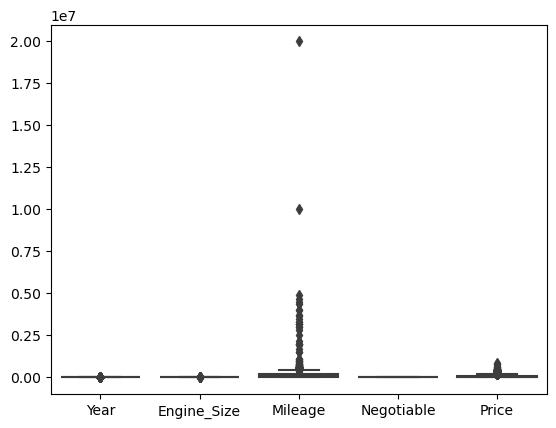

In [5]:
sns.boxplot(data=data)

Outlier terdapat pada kolom mileage sebagai salah satu fitur dan price sebagai target. Pada perancangan sebuah model supervised machine learning, outliers sangat berpengaruh dengan proses pelatihan model. Oleh sebab itu outliers akan dihapus dengan rumus statistik 
- IQR=Q3−Q1
- Batas Bawah =Q1−k×IQR
- Batas Atas=Q3+k×IQR
- Titik data di bawah Batas Bawah atau di atas Batas Atas dianggap sebagai potensial outlier.
- Di sini, k adalah pengali yang menentukan rentang di dalamnya titik data dianggap normal. Pilihan umum untuk k adalah 1,5.

Pada kolom negotiable terdapat nilai false dan true yang memiliki makna 
- True : harga dapat dinegosiasi dan memiliki nilai 0 pada kolom Price
- False : harga tidak dapat dinegosiasi dan memiliki nilai bukan 0 pada kolom Price (memiliki nilai harga)
karena tujuan prediksi harga mobil maka saya tidak akan menggunakan negotiable True karena harga 0
- saya akan menghapus semua data dengan value pada kolom price 0 karena ada nilai price 0 tetapi negotiable true

In [6]:
# exclude negotiable true
data_non_nego = data[data['Price'] != 0]

cek outlier dengan rumus 3x IQR sebagai outlier extreme

In [7]:
Q1 = data_non_nego['Mileage'].quantile(0.25)
Q3 = data_non_nego['Mileage'].quantile(0.75)

IQR = Q3 - Q1

threshold = 3

outliers_mileage = (data_non_nego['Mileage'] < (Q1 - (threshold * IQR))) | (data_non_nego['Mileage'] > (Q3 + (threshold * IQR)))

display(data_non_nego[outliers_mileage])
display(f'proporsi data outlier mileage : {round(len(data_non_nego[outliers_mileage])/len(data)*100,2)} persen')

print(f'Batas atas untuk kolom Mileagae : {Q3 + (threshold * IQR)} (batas bawah adalah 0)')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
110,Optra,Riyadh,Chevrolet,Automatic,Saudi,Standard,2007,1.6,2000000,False,5000
333,Range Rover,Jeddah,Land Rover,Automatic,Saudi,Full,2009,2.4,2013000,False,35000
453,Azera,Riyadh,Hyundai,Automatic,Saudi,Semi Full,2018,3.5,1100000,False,80000
536,Datsun,Riyadh,Nissan,Manual,Other,Full,1998,2.4,650000,False,12000
572,Camry,Yanbu,Toyota,Automatic,Other,Full,1998,2.5,4500000,False,15000
578,Copper,Qassim,MINI,Manual,Saudi,Full,1998,2.0,900000,False,40000
915,Pathfinder,Riyadh,Nissan,Automatic,Saudi,Standard,1998,3.5,3180003,False,10500
1264,Land Cruiser,Dammam,Toyota,Manual,Saudi,Standard,1994,4.6,600000,False,25000
1334,Prado,Makkah,Toyota,Manual,Saudi,Semi Full,2006,4.0,2800000,False,35000
1412,Trailblazer,Jeddah,Chevrolet,Automatic,Other,Full,2004,5.3,3500000,False,10000


'proporsi data outlier mileage : 0.52 persen'

Batas atas untuk kolom Mileagae : 588000.0 (batas bawah adalah 0)


Data outlier pada mileage yang melebihi 3x IQR akan saya drop/tidak digunakan



In [8]:
data_mile = data_non_nego[~outliers_mileage]
display(data_mile)
data_mile.describe()


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


,Year,Engine_Size,Mileage,Price
count,3798.000000,3798.000000,3798.000000,3798.000000
mean,2014.921538,3.181464,125697.472091,78365.245656
std,5.034268,1.459627,105430.626298,72849.286591
min,1963.000000,1.000000,100.000000,1.000000
25%,2014.000000,2.000000,48000.000000,35000.000000
50%,2016.000000,2.700000,102000.000000,58000.000000
75%,2018.000000,4.000000,180000.000000,95000.000000
max,2021.000000,9.000000,573000.000000,850000.000000


menangani outlier price
Setelah saya mencari tahu dari beberapa e-commmerce mobil bekas di saudi arabia harga dengan nilai batas bawah adalah 10000 SAR (saudi arabia riyal) dan untuk batas atas ada di ada 3000000 SAR. Sehingga saya akan menggunakan data antara 10000 SAR hingga 3000000 SAR

- referensi : https://ksa.carswitch.com/en/saudi/used-cars/search?sort=price%20ASC#

In [9]:
data_clean = data_mile[(data_mile['Price']>=10000) & (data_mile['Price']<=3000000)]
data_clean

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


cek dan cleaning duplikat

In [10]:
data_clean.duplicated().sum()

3

In [11]:
data_use = data_clean.drop_duplicates()
display(data_use.duplicated().sum())

# proporsi data yang dipakai
display(data_use)
display(f'proporsi data yang digunakan : {round(len(data_use)/len(data)*100,2)} %')

0

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


'proporsi data yang digunakan : 65.79 %'

cek outlier setelah cleaning data

<Axes: >

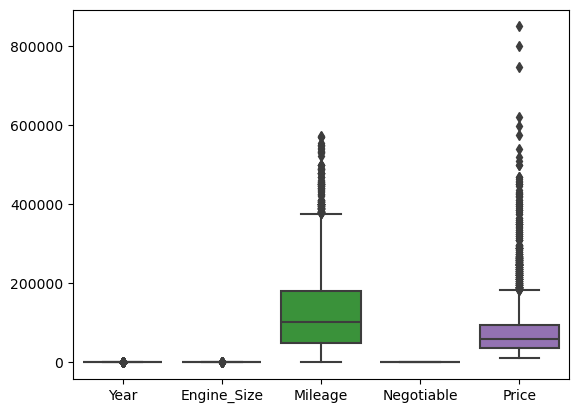

In [12]:
sns.boxplot(data=data_use)

## FEATURE ENGINEERING

- kolom target : Price
- kolom feature : Type,Make,Gear_Type,Year,Engine_Size,Mileage,Region,Origin,Option
- kolom Negotiable tidak saya pakai karena data yang saya gunakan hanya Negotiable False

In [13]:
# cek tipe data dan jumlah varian data
print(data_use.info()) # tipe
print(data_use.nunique()) # varian


<class 'pandas.core.frame.DataFrame'>
Index: 3700 entries, 1 to 5622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3700 non-null   object 
 1   Region       3700 non-null   object 
 2   Make         3700 non-null   object 
 3   Gear_Type    3700 non-null   object 
 4   Origin       3700 non-null   object 
 5   Options      3700 non-null   object 
 6   Year         3700 non-null   int64  
 7   Engine_Size  3700 non-null   float64
 8   Mileage      3700 non-null   int64  
 9   Negotiable   3700 non-null   bool   
 10  Price        3700 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 321.6+ KB
None
Type            313
Region           27
Make             56
Gear_Type         2
Origin            4
Options           3
Year             40
Engine_Size      65
Mileage        1298
Negotiable        1
Price           393
dtype: int64


data splitting

In [14]:
x = data_use[['Type','Make','Gear_Type','Origin','Options','Year','Engine_Size','Mileage','Region']]
y = data_use['Price']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2020,test_size=0.2)


encoding dan scaling feature pipeline
- kategorikal menggunakan one hot encoder (Gear_Type,Origin,Options) karena varian kurang dari 6 dan 
- binary encoder (Type,Make,Region) karena varian lebih dari 6
- numerical gunakan robust scaler (Year,Engine_Size,Mileage) karena robust scaler lebih tahan terhadap outlier

In [15]:
BE_pipe = Pipeline([('imputers', SimpleImputer(strategy='constant',fill_value='other')), ('BE', BinaryEncoder())])

prepros = ColumnTransformer([
    ('One Hot Encode',OneHotEncoder(drop='first',handle_unknown='ignore'),['Gear_Type','Origin','Options']),
    ('Binary Encode',BE_pipe,['Type','Make','Region']),
    ('Robust Scaler',RobustScaler(),['Year','Engine_Size','Mileage'])
],remainder='passthrough')
prepros

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot Encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('Binary Encode',
                                 Pipeline(steps=[('imputers',
                                                  SimpleImputer(fill_value='other',
                                                                strategy='constant')),
                                                 ('BE', BinaryEncoder())]),
                                 ['Type', 'Make', 'Region']),
                                ('Robust Scaler', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage'])])

## MODEL BENCHMARKING

Define Model

In [16]:
# Linear Regression
linreg = LinearRegression()

# Huber Regressor
huber_model = HuberRegressor()

# RANSAC Regressor
ransac_model = RANSACRegressor()

# Theil-Sen Regressor
theil_sen_model = TheilSenRegressor()

# Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=1)

# K-Neighbors Regressor
k_neighbors_model = KNeighborsRegressor()

# Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=1)

# CatBoostRegressor
catboost_model = CatBoostRegressor(verbose=False,random_state=1)

# AdaBoostRegressor
adaboost_model = AdaBoostRegressor(random_state=1)

# svr
svr = SVR()


model benchmarking menggunakan 9 model seperti diatas. di tes menggunakan metrics MAPE
- Sesuaikan dan evaluasi setiap model dengan cross validation silang menggunakan metrics MAPE
- bertujuan untuk menentukan 3 model yang memiliki potensi paling baik yang akan dilakukan tuning hyperparameter sehingga hasil prediksi lebih maksimal

In [34]:
# Sesuaikan dan evaluasi setiap model dengan cross validation menggunakan metrics MAPE
models = {'Linear Regression':linreg, 'Huber Regressor': huber_model, 
          'Ransac Regressor': ransac_model,'Theil-Sen Regressor': theil_sen_model,
          'DT Regressor':decision_tree_model,'KNN Regressor': k_neighbors_model,'RF Regressor': random_forest_model,
          'CatBoost Regressor':catboost_model,'AdaBoost Regressor':adaboost_model,'SVR':svr}

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

models_transform = {}

for model_name, model in models.items():
    models_transform[f'{model_name} Transform'] = TransformedTargetRegressor(model, func=np.log1p, inverse_func=np.expm1)


score_mape = []
score_mse = []
score_r2 = []
score_RMSE = []
score_MAE = []

score_mape_trans = []
score_mse_trans = []
score_r2_trans = []
score_RMSE_trans = []
score_MAE_trans = []

# crossval tanpa TransformedTargetRegressor
for model_name, model in models.items():
    model_pipeline = Pipeline([
        ('preprocessor', prepros),
        ('model', model)
    ])
    kFold = KFold(n_splits=5,shuffle=True, random_state=1)
    
    model_cv_MAPE = cross_val_score(model_pipeline, x_train, y_train, cv=kFold,scoring='neg_mean_absolute_percentage_error',error_score='raise')
    model_cv_RMSE = cross_val_score(model_pipeline, x_train, y_train, cv=kFold,scoring='neg_root_mean_squared_error')
    model_cv_MAE = cross_val_score(model_pipeline, x_train, y_train, cv=kFold,scoring='neg_mean_absolute_error')

    score_mape.append(model_cv_MAPE)
    score_RMSE.append(model_cv_RMSE)
    score_MAE.append(model_cv_MAE)

# crossval dengan TransformedTargetRegressor
for model_name, model in models_transform.items():
    model_pipeline_trans = Pipeline([
        ('preprocessor', prepros),
        ('model', model)
    ])
    kFold = KFold(n_splits=5,shuffle=True, random_state=1)
    
    model_cv_MAPE_trans = cross_val_score(model_pipeline_trans, x_train, y_train, cv=kFold,scoring='neg_mean_absolute_percentage_error',error_score='raise')
    model_cv_RMSE_trans = cross_val_score(model_pipeline_trans, x_train, y_train, cv=kFold,scoring='neg_root_mean_squared_error')
    model_cv_MAE_trans = cross_val_score(model_pipeline_trans, x_train, y_train, cv=kFold,scoring='neg_mean_absolute_error')

    score_mape_trans.append(model_cv_MAPE_trans)
    score_RMSE_trans.append(model_cv_RMSE_trans)
    score_MAE_trans.append(model_cv_MAE_trans)




Tampilkan hasil evaluasi model dan scoring metrics. Membandingkan hasil antara menggunakan TransformedTargetRegressor dengan tidak menggunakan TransformedTargetRegressor.

In [35]:
# hasil crossval tanpa TransformedTargetRegressor
result = pd.DataFrame({
    'Model': list(models.keys()),
    'MAPE Score': [np.mean(score) for score in score_mape],
    'STD MAPE': [np.std(score) for score in score_mape],
    'RMSE Score': [np.mean(score) for score in score_RMSE],
    'STD RMSE': [np.std(score) for score in score_RMSE],
    'MAE Score': [np.mean(score) for score in score_MAE],
    'STD MAE': [np.std(score) for score in score_MAE]
})

# hasil crossval dengan TransformedTargetRegressor
result_trans = pd.DataFrame({
    'Model trans': list(models.keys()),
    'MAPE Score trans': [np.mean(score) for score in score_mape_trans],
    'STD MAPE trans': [np.std(score) for score in score_mape_trans],
    'RMSE Score trans': [np.mean(score) for score in score_RMSE_trans],
    'STD RMSE trans': [np.std(score) for score in score_RMSE_trans],
    'MAE Score trans': [np.mean(score) for score in score_MAE_trans],
    'STD MAE trans': [np.std(score) for score in score_MAE_trans]
})


display(result.sort_values(by='MAPE Score',ascending=False))
display(result_trans.sort_values(by='MAPE Score trans',ascending=False))


,Model,MAPE Score,STD MAPE,RMSE Score,STD RMSE,MAE Score,STD MAE
7,CatBoost Regressor,-0.229057,0.012862,-31044.179537,2611.485062,-15695.074847,823.387685
6,RF Regressor,-0.283317,0.024324,-36873.606761,4006.324835,-18848.396651,1689.357287
5,KNN Regressor,-0.322173,0.020500,-37581.444871,3855.122568,-19815.544527,620.260799
4,DT Regressor,-0.346952,0.019467,-53218.892215,11326.356728,-25220.053716,2608.168785
1,Huber Regressor,-0.470297,0.027841,-58304.495270,2644.742344,-30881.698191,1639.447712
3,Theil-Sen Regressor,-0.613158,0.049497,-56432.510236,3611.484579,-33293.350838,2126.929325
0,Linear Regression,-0.627280,0.036303,-55520.808532,2884.340442,-34222.736339,1825.928562
9,SVR,-0.652508,0.039989,-76306.014598,2989.547562,-43489.617103,2484.483090
2,Ransac Regressor,-0.781350,0.132618,-68614.473348,2275.319006,-45079.963565,5637.191379
8,AdaBoost Regressor,-1.355983,0.184980,-69953.023202,3666.611344,-60043.474758,5199.637018


,Model trans,MAPE Score trans,STD MAPE trans,RMSE Score trans,STD RMSE trans,MAE Score trans,STD MAE trans
7,CatBoost Regressor,-0.183644,0.009967,-30335.970869,2250.933131,-14305.809268,569.017828
9,SVR,-0.198261,0.013389,-34368.927529,4395.984621,-15570.282110,565.244019
6,RF Regressor,-0.229946,0.012173,-37645.228935,4230.644623,-17686.610025,1166.797752
5,KNN Regressor,-0.283525,0.017324,-38512.400222,3482.366091,-19065.229630,398.630779
4,DT Regressor,-0.349865,0.026678,-50871.085428,5410.630293,-24504.660113,2104.768252
1,Huber Regressor,-0.351432,0.016334,-53263.422543,2897.647299,-27315.091875,1204.371974
3,Theil-Sen Regressor,-0.353405,0.015551,-52376.977712,2932.779989,-27276.415069,1238.190738
0,Linear Regression,-0.374927,0.014487,-52779.780301,2577.930567,-27924.701607,1005.782852
8,AdaBoost Regressor,-0.400985,0.021863,-50492.098272,3092.822878,-28898.991899,2267.892134
2,Ransac Regressor,-0.468354,0.039898,-64117.107537,3362.290201,-36576.430483,4201.918159


Menggunakan target yang sudah menggunakan TransformedTargetRegressor karena hasil overall lebih bagus atau angka lebih mendekati 0, Metrics yang akan digunakan adalah MAPE (Mean Absoulute Absoulte Error) dan 3 model teratas yaitu Catboost regressor, SVR, dan RF regressor

## TUNING HYPERPARAMETER

Melakukan tuning hyper parameter untuk catboost regressor,svr, dan rf regressor dengan tambahan TransformedTargetRegressor untuk target. Scoring metrics yang akan digunakan adalah MAPE

Tuning hyperparameter catboost regressor dengan TransformedTargetRegressor metrics MAPE,RMSE, dan MAE

In [20]:
# Define the grid of hyperparameters to search
param_grid = {
    'model__regressor__iterations': [1000, 1500],
    'model__regressor__learning_rate': [0.01, 0.05],
    'model__regressor__depth': [6, 8],
    'model__regressor__l2_leaf_reg': [3, 5],
    'model__regressor__verbose': [False]
}

pipe_tuning_catboost = Pipeline([
    ('preprocessor', prepros),
    ('model', TransformedTargetRegressor(regressor=CatBoostRegressor(), func=np.log1p, inverse_func=np.expm1))
])

# Create GridSearchCV object
grid_search_MAPE_catboost = GridSearchCV(estimator=pipe_tuning_catboost, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5)


# Fit the model to the data
grid_search_MAPE_catboost.fit(x_train, y_train)






GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encode',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('Binary '
                                                                         'Encode',
                                                                         Pipeline(steps=[('imputers',
                                                                                          SimpleImputer(fill_value='other',
                                                                                                        strategy='constant')),
                                                                                         ('BE',
                                                                                          BinaryEncoder())]),
                                                                         ['...
                                                                   inverse_func=<ufunc 'expm1'>,
                                                                   regressor=<catboost.core.CatBoostRegressor object at 0x00000242F94A8190>))]),
             param_grid={'model__regressor__depth': [6, 8],
                         'model__regressor__iterations': [1000, 1500],
                         'model__regressor__l2_leaf_reg': [3, 5],
                         'model__regressor__learning_rate': [0.01, 0.05],
                         'model__regressor__verbose': [False]},
             scoring='neg_mean_absolute_percentage_error')

In [21]:
# print hasil tuning catboost
result_catboost_tune = pd.DataFrame({
    'Model': 'CatBoost Regressor',
    'MAPE best': [grid_search_MAPE_catboost.best_params_],
    'score MAPE': [grid_search_MAPE_catboost.best_score_]
})

result_catboost_tune

,Model,MAPE best,score MAPE
0,CatBoost Regressor,"{'model__regressor__depth': 6, 'model__regressor__iterations': 1500, 'model__regressor__l2_leaf_reg': 3, 'model__regressor__learning_rate': 0.05, 'model__regressor__verbose': False}",-0.182039


Hyperparameter tuning SVR

In [22]:
# Define the grid of hyperparameters to search
param_grid = {
    'model__regressor__C': [0.1, 1],
    'model__regressor__kernel': ['poly', 'rbf'],
    'model__regressor__epsilon': [0.1, 0.2],
    'model__regressor__gamma': ['scale', 0.1]
}

pipe_tuning_svr = Pipeline([
    ('preprocessor', prepros),
    ('model', TransformedTargetRegressor(regressor=SVR(), func=np.log1p, inverse_func=np.expm1))
])

# Create GridSearchCV object
grid_search_MAPE_svr = GridSearchCV(estimator=pipe_tuning_svr, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5)



# Fit the model to the data
grid_search_MAPE_svr.fit(x_train, y_train)





GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encode',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('Binary '
                                                                         'Encode',
                                                                         Pipeline(steps=[('imputers',
                                                                                          SimpleImputer(fill_value='other',
                                                                                                        strategy='constant')),
                                                                                         ('BE',
                                                                                          BinaryEncoder())]),
                                                                         ['...
                                                                         RobustScaler(),
                                                                         ['Year',
                                                                          'Engine_Size',
                                                                          'Mileage'])])),
                                       ('model',
                                        TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                                                   inverse_func=<ufunc 'expm1'>,
                                                                   regressor=SVR()))]),
             param_grid={'model__regressor__C': [0.1, 1],
                         'model__regressor__epsilon': [0.1, 0.2],
                         'model__regressor__gamma': ['scale', 0.1],
                         'model__regressor__kernel': ['poly', 'rbf']},
             scoring='neg_mean_absolute_percentage_error')

In [23]:
# print hasil tuning catboost
result_svr_tune = pd.DataFrame({
    'Model': 'SVR',
    'MAPE best': [grid_search_MAPE_svr.best_params_],
    'score MAPE': [grid_search_MAPE_svr.best_score_]
})
result_svr_tune

,Model,MAPE best,score MAPE
0,SVR,"{'model__regressor__C': 1, 'model__regressor__epsilon': 0.1, 'model__regressor__gamma': 'scale', 'model__regressor__kernel': 'rbf'}",-0.200747


hyperparameter tuning RF Regressor

In [24]:
# Define the grid of hyperparameters to search
param_grid = {
    'model__regressor__n_estimators': [100, 150],
    'model__regressor__max_depth': [None, 10],
    'model__regressor__min_samples_split': [2, 5],
    'model__regressor__min_samples_leaf': [1, 2],
    'model__regressor__max_features': ['sqrt', 'log2']
}

pipe_tuning_rfr = Pipeline([
    ('preprocessor', prepros),
    ('model', TransformedTargetRegressor(regressor=RandomForestRegressor(), func=np.log1p, inverse_func=np.expm1))
])

# Create GridSearchCV object
grid_search_MAPE_rfr = GridSearchCV(estimator=pipe_tuning_rfr, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5)



# Fit the model to the data
grid_search_MAPE_rfr.fit(x_train, y_train)






GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encode',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('Binary '
                                                                         'Encode',
                                                                         Pipeline(steps=[('imputers',
                                                                                          SimpleImputer(fill_value='other',
                                                                                                        strategy='constant')),
                                                                                         ('BE',
                                                                                          BinaryEncoder())]),
                                                                         ['...
                                        TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                                                   inverse_func=<ufunc 'expm1'>,
                                                                   regressor=RandomForestRegressor()))]),
             param_grid={'model__regressor__max_depth': [None, 10],
                         'model__regressor__max_features': ['sqrt', 'log2'],
                         'model__regressor__min_samples_leaf': [1, 2],
                         'model__regressor__min_samples_split': [2, 5],
                         'model__regressor__n_estimators': [100, 150]},
             scoring='neg_mean_absolute_percentage_error')

In [25]:
result_rfr_tune = pd.DataFrame({
    'Model': 'RF Regressor',
    'MAPE best': [grid_search_MAPE_rfr.best_params_],
    'score MAPE': [grid_search_MAPE_rfr.best_score_]
})
result_rfr_tune

,Model,MAPE best,score MAPE
0,RF Regressor,"{'model__regressor__max_depth': None, 'model__regressor__max_features': 'sqrt', 'model__regressor__min_samples_leaf': 1, 'model__regressor__min_samples_split': 2, 'model__regressor__n_estimators': 100}",-0.23276


Membandingkan hasil tuning antara 3 model

In [26]:
tuning_result = pd.concat([result_catboost_tune,result_rfr_tune,result_svr_tune])
tuning_result

,Model,MAPE best,score MAPE
0,CatBoost Regressor,"{'model__regressor__depth': 6, 'model__regressor__iterations': 1500, 'model__regressor__l2_leaf_reg': 3, 'model__regressor__learning_rate': 0.05, 'model__regressor__verbose': False}",-0.182039
0,RF Regressor,"{'model__regressor__max_depth': None, 'model__regressor__max_features': 'sqrt', 'model__regressor__min_samples_leaf': 1, 'model__regressor__min_samples_split': 2, 'model__regressor__n_estimators': 100}",-0.232760
0,SVR,"{'model__regressor__C': 1, 'model__regressor__epsilon': 0.1, 'model__regressor__gamma': 'scale', 'model__regressor__kernel': 'rbf'}",-0.200747


Perbandingan nilai MAPE Catboost sebelum dan setelah tuning.
- Catboost sebelum tuning dengan hyperparameter default dan transform target: log1p sebelum tuning memiliki nilai : 0.183644
- Catboost setelah tuning dengan hyperparameter depth: 6, iterations: 1500, learning_rate: 0.05, l2 leaf ref: 3 dan juga transform target: log1p memiliki nilai : 0.182039	

Dari hasil nilai diatas maka model paling bagus dari hasil benchmark dan tuning adalah model hasil terbaik hasil tuning yang memiliki nilai MAPE (Mean Absolute Percentage Error) : 0.182039. Rincian model tersebut adalah
- Catboost Regressor dengan hyperparameter : 

| Hyperparameter     | Value |
|-------------------- |-------|
| Depth              | 6     |
| Iterations         | 1500  |
| Learning Rate      | 0.05  |
| L2 Leaf Reference  | 3     |

## Performance Test

Melakukan prediksi pada x_test menggunakan model terbaik dengan hyperparameter terbaik yaitu 

<span style="color:Yellow">Catboost Regressor(depth: 6,iterations: 1500,learning_rate: 0.05,l2 leaf ref: 3)</span>

In [27]:
# define model
catboost_regressor_pred = CatBoostRegressor(
    depth=8,
    iterations=200,
    learning_rate=0.1,
    verbose=False  
)

# TransformedTargetRegressor
catboost_regressor_pred_trans = TransformedTargetRegressor(catboost_regressor_pred, func=np.log1p, inverse_func=np.expm1)

# add preprocess
catboost_regressor_pred_pipeline = Pipeline([
        ('preprocessor', prepros),
        ('model', catboost_regressor_pred_trans)
    ])

# fit model
catboost_regressor_pred_pipeline.fit(x_train,y_train)


# Simpan nilai metrics MAPE prediction
mape_catboost_pred = -mean_absolute_percentage_error(y_test, catboost_regressor_pred_pipeline.predict(x_test))


prediction_score = pd.DataFrame({'score MAPE': mape_catboost_pred},index=['Catboost Regressor'])
prediction_score

,score MAPE
Catboost Regressor,-0.183775


Membandingkan model hasil x_train dengan model hasil x_test

In [28]:
compare_result = pd.concat(
    [result_catboost_tune[['score MAPE']],
    prediction_score],axis=0)
compare_result.reset_index(inplace=True)
compare_result.rename(columns={'index':'Data'},inplace=True)
compare_result.loc[compare_result.index.isin([0,1]), 'Data'] = ['x_train','x_test']
compare_result


,Data,score MAPE
0,x_train,-0.182039
1,x_test,-0.183775


Menurut hasil diatas prediksi antara x_test dan X_train memiliki nilai MAPE yang tidak begitu berbeda sehingga dapat disimpulkan model ini bekerja cukup baik saat memprediksi data yang baru dan tidak mengalami overfitting atau underfitting.

### RESIDUAL ANALYSIS

Slope nilai asli : 0.9999999999999999


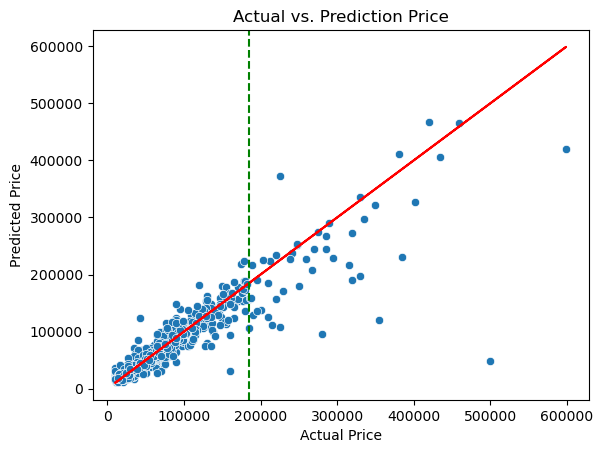

In [29]:
plot = sns.scatterplot(x=y_test, y=catboost_regressor_pred_pipeline.predict(x_test)).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')
# Calculate the slope and intercept of the regression line
slope, intercept = np.polyfit(y_test, catboost_regressor_pred_pipeline.predict(x_test), 1)
slope1, intercept1 = np.polyfit(y_test, y_test, 1)

# Plot the regression line
plt.plot(y_test, slope1 * y_test + intercept1, color='red')
plt.axvline(x=185000, color='green', linestyle='--', label='Vertical Line')
plt.show
print(f'Slope nilai asli : {slope1}')

Data asli memiliki kemiringan atau slope 0.99 atau hasil ideal. Berdasarkan gambar diatas, semakin tinggi nilai price semakin besar error prediksi dibandingkan nilai asli. Data dengan nilai diatas sekitar 185000 nilai error prediksi lebih besar dibanding data dibawah 185000.

### FEATURE IMPORTANCE

In [30]:
catboost_regressor_pred_pipeline.fit(x_train,y_train)


feature_importance = catboost_regressor_pred_pipeline['model'].regressor_.get_feature_importance()

importance_df = pd.DataFrame({'Feature': prepros.get_feature_names_out(), 'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
display(importance_df)

,Feature,Importance
26,Robust Scaler__Year,27.449833
27,Robust Scaler__Engine_Size,19.658141
18,Binary Encode__1_3,9.770600
28,Robust Scaler__Mileage,7.695191
20,Binary Encode__1_5,5.668083
19,Binary Encode__1_4,4.062744
14,Binary Encode__0_8,3.611319
5,One Hot Encode__Options_Standard,3.272368
17,Binary Encode__1_2,2.451247
10,Binary Encode__0_4,2.165327


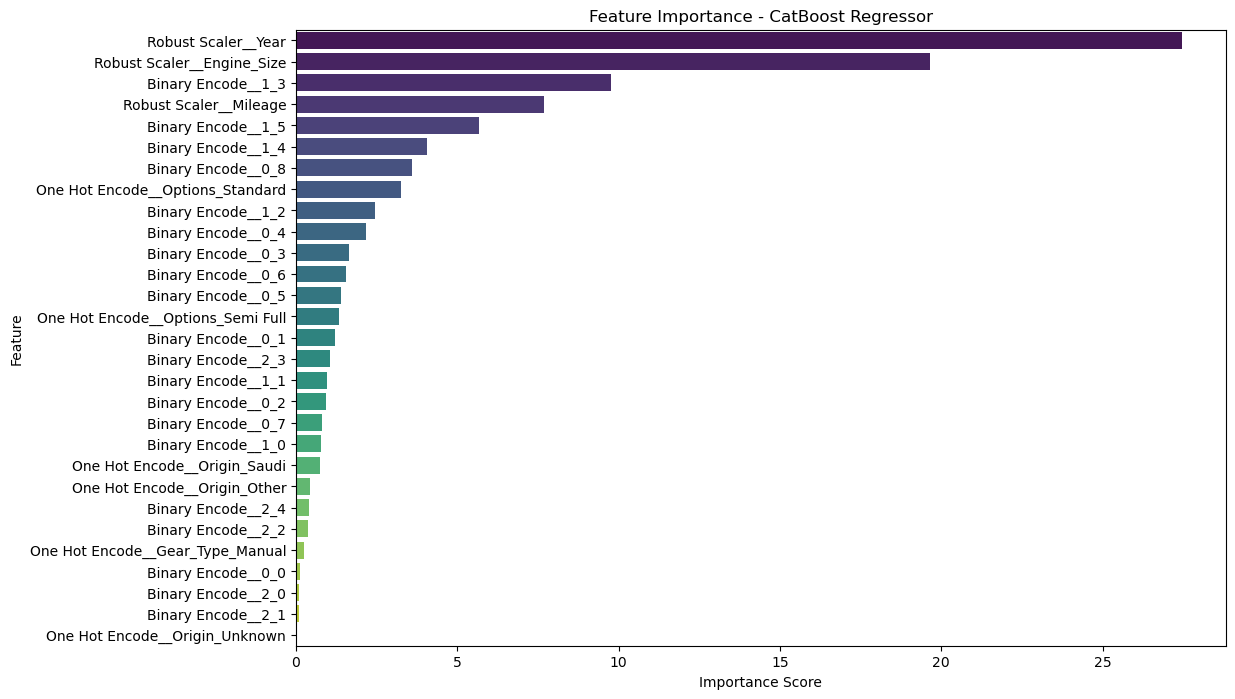

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - CatBoost Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Berdasarkan nilai diatas 5 fitur paling penting dan berpengaruh adalah 
1. Robust Scaler__Year : 27.449833
2. Robust Scaler__Engine_Size :	19.658141
3. Binary Encode__1_3 (Type) : 9.770600
4. Robust Scaler__Mileage : 7.695191
5. Binary Encode__1_5 (Type) : 5.668083

Fitur Year dan Engine Size memiliki pengaruh paling besar terhadap hasil prediksi model ini.

## KESIMPULAN

Perancangan model machine learning ini menggunakan 9 model saat benchmark untuk menemukan 3 model terbaik menggunakan metrics MAPE,MAE, dan RMSE. Selain itu saya juga melakukan TransformedTargetRegressor log1p kepada target dan membandingkannya dengan target tanpa proses TransformedTargetRegressor. 3 model terbaik itu adalah Catboost Regressor, SVR, dan RF regressor yang akan dilakukan tuning hyperparameter GridSearch untuk mendapatkan model yang memiliki hyperparameter dengan hasil nilai terbaik. Model tersebut adalah Catboost setelah tuning dengan hyperparameter

| Hyperparameter     | Value |
|-------------------- |-------|
| Depth              | 6     |
| Iterations         | 1500  |
| Learning Rate      | 0.05  |
| L2 Leaf Reference  | 3     |

Hasil dari perancangan model ini menunjukkan bahwa model CatBoost Regressor dengan hyperparameter tersebut memiliki performa yang baik, terutama setelah mengubah hyperparameter. Setelah tuning, nilai MAPE CatBoost Regressor berhasil turun dari sekitar 0.183 atau 18.3% (hasil benchmark) menjadi sekitar 0.182 atau 18.2%, menunjukkan bahwa prediksinya lebih akurat. Untuk proses testing dengan data x_test juga menunjukan hasil tidak jauh berbeda dibandingkan dengan data x_train, yaitu:

| Data    | score MAPE |
|---------|------------|
| x_train | -0.182039  |
| x_test  | -0.183775  |

Sehingga disimpulkan model memiliki kinerja yang baik dan konsisten karena dapat memprediksi data yang belum pernah dilihat atau digunakan sebelumnya.

Tetapi model ini juga memiliki batasan pada fitur yang digunakan dalam proses prediksi. Meskipun telah mencakup berbagai fitur seperti jenis mobil, merek, tahun pembuatan, dan lainnya, namun keterbatasan data yang tersedia dapat mempengaruhi kemampuan model untuk memperhitungkan faktor-faktor tertentu yang mungkin memiliki pengaruh signifikan terhadap harga mobil bekas. Keterbatasan lainnya adalah model ini hanya dapat memprediksi harga mobil dengan akurat harga maksimal 850000 SAR dan mobil yang tidak bisa di negosiasi. Oleh karena itu, hasil prediksi sebaiknya digunakan dengan bijak dan dipertimbangkan dalam konteks kondisi pasar dan data yang spesifik.

## REKOMENDASI

1. Pengembangan Model CatBoost Regressor:
- Model CatBoost Regressor dengan hyperparameter yang telah dituning menunjukkan kinerja yang baik. Oleh karena itu, disarankan untuk mengimplementasikan model ini dalam lingkungan produksi untuk memprediksi harga mobil bekas.
- Dalam penggunaan praktis, model ini dapat memberikan panduan harga yang lebih akurat dan kompetitif kepada penjual dan pembeli mobil bekas di Arab Saudi.

2. Pertimbangkan Konteks Pasar:
- Meskipun model telah memberikan hasil yang baik, penting untuk selalu mempertimbangkan konteks pasar yang dinamis. Faktor-faktor eksternal seperti perubahan kebijakan, tren ekonomi, dan fluktuasi pasar dapat memengaruhi harga mobil. Oleh karena itu, pemantauan terus-menerus terhadap perubahan pasar diperlukan.

3. Perluasan Data dan Feature:
- Untuk meningkatkan kinerja model, pertimbangkan untuk memperluas dataset dengan menyertakan lebih banyak data mobil bekas dan fitur yang relevan. Informasi tambahan seperti kondisi mesin, riwayat perawatan, dan faktor-faktor lingkungan dapat membantu model lebih baik dalam membuat prediksi.

4. Optimasi Kinerja Model:
- Terus lakukan evaluasi dan optimasi kinerja model secara berkala. Hal ini dapat melibatkan pemantauan performa model pada data uji yang baru, serta penyesuaian hyperparameter atau pengembangan model lebih lanjut untuk meningkatkan akurasi.

5. Edukasi Pengguna:
- Edukasi kepada pengguna, baik penjual maupun pembeli, tentang cara model ini menghasilkan prediksi harga dapat meningkatkan kepercayaan dan penggunaan model. Memberikan pemahaman tentang fitur-fitur yang signifikan dalam menentukan harga juga dapat meningkatkan penerimaan model di pasar.

6. Interaksi dengan Platform E-Commerce:
- Jika mungkin, integrasikan model ini dengan platform e-commerce mobil bekas di Arab Saudi. Hal ini dapat memberikan keuntungan kepada penjual dan pembeli yang menggunakan platform tersebut dengan memberikan estimasi harga yang lebih akurat.

7. Evaluasi dan Pembaruan Berkala:
- Lakukan evaluasi berkala terhadap model ini untuk memastikan konsistensi kinerja. Jika ada perubahan signifikan dalam data pasar atau perubahan dalam tren konsumen, model perlu diperbarui atau disesuaikan untuk mencerminkan kondisi terkini.

8. Penelitian Lebih Lanjut:
Teruskan penelitian lebih lanjut untuk meningkatkan keakuratan dan ketelitian model. Penggunaan teknologi terbaru atau eksplorasi fitur-fitur tambahan dapat membawa inovasi dalam prediksi harga mobil bekas.